# XGBoost

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [4]:
import xgboost as xgb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.0001, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.1, 1.0),
                'colsample_bytree': Real(0.1, 1.0)
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}XGBoost/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)

In [5]:
xgb_model.fit_params_search = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_train, xgb_model.y_train)],
                "verbose": True
            }

In [5]:
xgb_model.X_train

,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,Alpha2_canon_EPP_OCC_left,Alpha2_canon_EPP_OCC_right,Alpha2_canon_RPD_HPC_left,Alpha2_canon_RPD_HPC_right,Alpha2_canon_RPD_CING_left,Alpha2_canon_RPD_CING_right,...,IAF_MFG_left,IAF_MFG_right,IAF_SFG_left,IAF_SFG_right,IAF_HPC_left,IAF_HPC_right,IAF_INS_left,IAF_INS_right,IAF_OCC_left,IAF_OCC_right
90,0.443012,0.750750,0.503964,0.557059,0.444345,0.513807,0.443012,0.750750,0.426862,0.639835,...,0.84375,1.00000,0.968750,1.000000,0.895833,1.000000,0.87500,0.96875,0.843750,0.875000
875,0.246819,0.279831,0.392366,0.173703,0.154517,0.152665,0.246819,0.279831,0.270762,0.227707,...,0.09375,0.31250,0.062500,0.359375,0.354167,0.375000,0.00000,0.37500,0.291667,0.114583
1071,0.110016,0.165896,0.254145,0.242630,0.187527,0.244504,0.110016,0.165896,0.287200,0.289306,...,0.09375,1.00000,0.218750,0.750000,0.104167,1.000000,0.34375,1.00000,0.187500,0.197917
262,0.107690,0.157429,0.171272,0.153490,0.127418,0.199072,0.107690,0.157429,0.159748,0.159159,...,0.25000,0.31250,0.203125,0.250000,0.312500,0.208333,0.34375,0.15625,0.322917,0.343750
680,0.111676,0.167266,0.188762,0.173093,0.112524,0.153836,0.111676,0.167266,0.139126,0.128172,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.270833,0.18750,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.241545,0.362178,0.280236,0.254759,0.253358,0.318796,0.241545,0.362178,0.334207,0.312470,...,0.12500,0.15625,0.000000,0.000000,0.000000,0.333333,0.00000,0.43750,0.083333,0.072917
905,0.347318,0.387407,0.387011,0.336943,0.322991,0.359057,0.347318,0.387407,0.281207,0.343200,...,0.59375,0.59375,0.609375,0.500000,0.520833,0.500000,0.59375,0.46875,0.562500,0.552083
1096,0.191804,0.377195,0.391482,0.347137,0.227045,0.297878,0.191804,0.377195,0.298968,0.278745,...,0.62500,0.62500,0.640625,0.625000,0.583333,0.583333,0.59375,0.59375,0.281250,0.291667
235,0.214283,0.321126,0.286065,0.265898,0.219207,0.289419,0.214283,0.321126,0.254958,0.232715,...,0.40625,0.40625,0.453125,0.515625,0.000000,0.104167,0.43750,0.28125,0.156250,0.166667


# Busqueda Hiperparametros

In [ ]:
opt_xgb, best_params_xgb = xgb_model.search_best_model(n_iter_=5, save_result=False)
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/XGBoost/Modelos/opt_XGB_model_all_features.pickle', 'wb') as file:
        #pickle.dump(opt_xgb, file)

In [6]:
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/XGBoost/Modelos/opt_XGB_model_400iter.pickle', 'wb') as file:
#        pickle.dump(opt_xgb, file)

In [51]:
with open(f'{path}Opt_Model/opt_XGB_model_400iter.pickle', 'rb') as file:
    opt_xgb= pickle.load(file)

In [5]:
resultados = xgb_model.opt_model.cv_results_
xgb_model.guardar_resultados_busqueda(resultados=resultados)

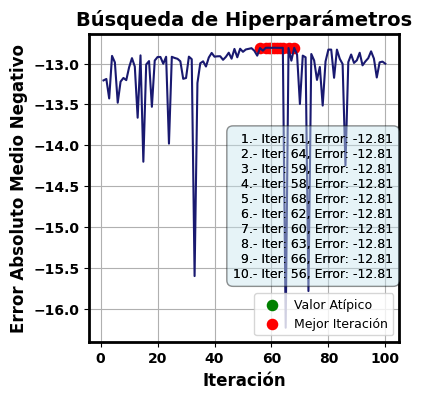

Top 1: Iteración 61, Error -12.80654194959161
Top 2: Iteración 64, Error -12.80695508927229
Top 3: Iteración 59, Error -12.80706503167492
Top 4: Iteración 58, Error -12.807343574589535
Top 5: Iteración 68, Error -12.807417714402481
Top 6: Iteración 62, Error -12.807698992792456
Top 7: Iteración 60, Error -12.808094283517125
Top 8: Iteración 63, Error -12.808369517017837
Top 9: Iteración 66, Error -12.810308821004108
Top 10: Iteración 56, Error -12.810748101202412


In [52]:
xgb_model.plot_search_best_model(opt_xgb,  linewidth=1.5, color='midnightblue', num_max=100)

In [53]:
best_params_xgb = xgb_model.best_hyper(opt_xgb, num_max=100)

In [54]:
best_params_xgb

[{'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 660,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 659,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 662,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 650,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 657,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 652,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 653,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 651,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 

# Trainer

In [30]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb[0])

In [22]:
xgb_model.guardar_resultados_trainer(resultados=results)

In [15]:
#with open(f'{path}Opt_Model/BestModel_XGB_all_features.pickle', 'wb') as file:
#    pickle.dump(best_model, file)
#with open(f'{path}Opt_Model/results_XGB_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)

In [32]:
with open(f'{path}Opt_Model/BestModel_XGB_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model/results_XGB_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

In [43]:
xgb_model.model= model

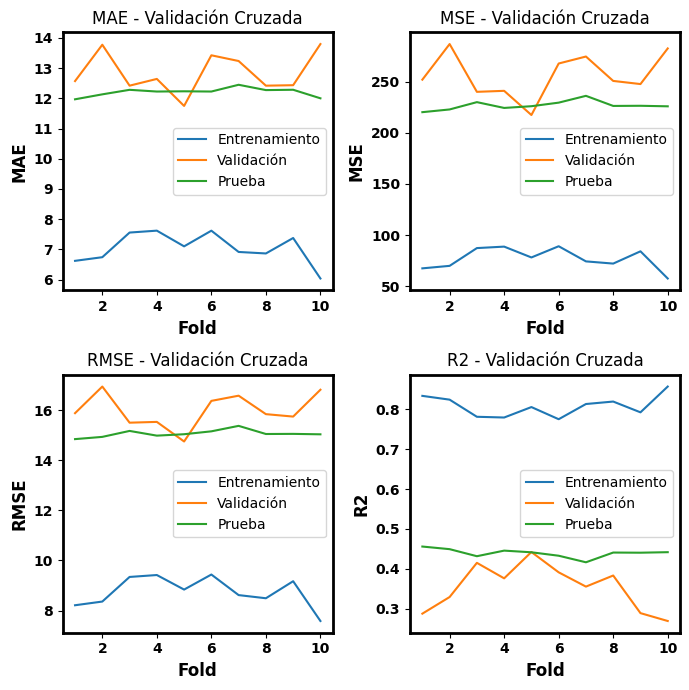

In [34]:
xgb_model.plot_metricas_evaluacion(results)

In [35]:
y_pred=xgb_model.predicter(xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     227.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           8.19e-38
Time:                        17:41:07   Log-Likelihood:                -995.68
No. Observations:                 276   AIC:                             1995.
Df Residuals:                     274   BIC:                             2003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8494      1.378     21.656      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


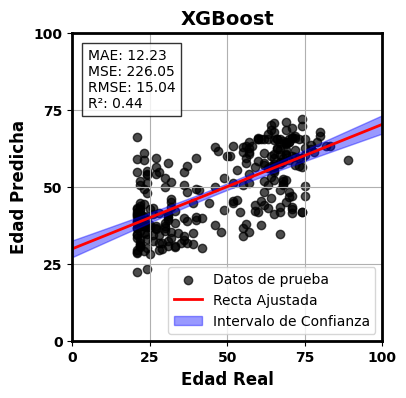

Error medio absoluto: 12.233215285960027
Error cuadrático medio: 226.0513158542853
Raíz del error cuadrático medio: 15.035003021425878
Coeficiente de determinación (R²): 0.4414449204493234


In [36]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [37]:
y_pred_train=xgb_model.predicter(xgb_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4651.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:41:21   Log-Likelihood:                -3561.3
No. Observations:                1101   AIC:                             7127.
Df Residuals:                    1099   BIC:                             7137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3243      0.496     36.920      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


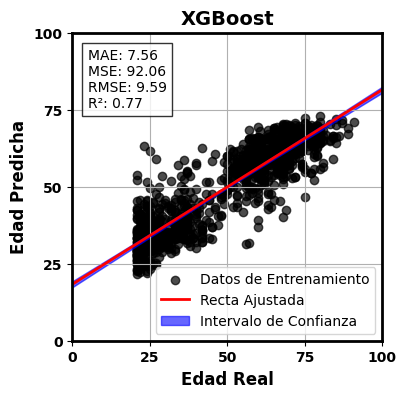

Error medio absoluto: 7.563524809816265
Error cuadrático medio: 92.055577237698
Raíz del error cuadrático medio: 9.59455977300147
Coeficiente de determinación (R²): 0.7701017003416942


In [38]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, label_='Datos de Entrenamiento',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',line_ideal=False,confidence_interval=True, save_fig=False, alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.6,color_line_fit='red')

In [39]:
residuals = xgb_model.predicter(xgb_model.X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1580.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          6.96e-215
Time:                        17:41:31   Log-Likelihood:                -3561.3
No. Observations:                1101   AIC:                             7127.
Df Residuals:                    1099   BIC:                             7137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3243      0.496     36.920      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


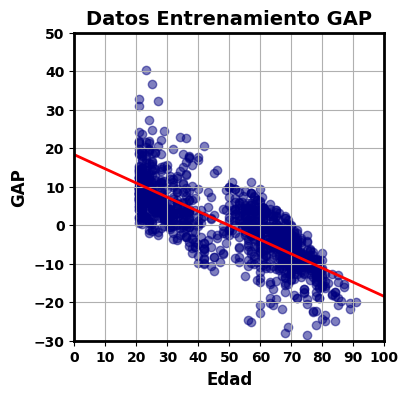

Error medio absoluto: 49.799860484521396
Error cuadrático medio: 3255.4482188324237
Raíz del error cuadrático medio: 57.056535285911146
Coeficiente de determinación (R²): -7.130110446244046


In [40]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='Datos Entrenamiento GAP', xlabel='Edad', ylabel='GAP')

In [41]:
y_pred_corrected=xgb_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     830.5
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           6.34e-85
Time:                        17:41:34   Log-Likelihood:                -995.68
No. Observations:                 276   AIC:                             1995.
Df Residuals:                     274   BIC:                             2003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5251      1.378      8.362      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


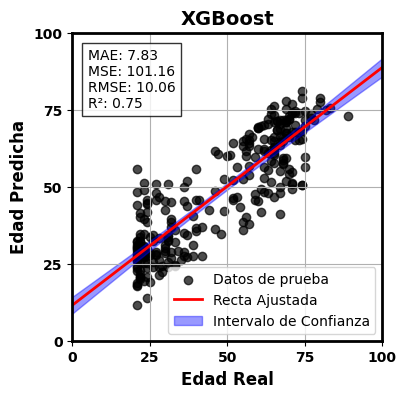

Error medio absoluto: 7.829180151561075
Error cuadrático medio: 101.16422328231953
Raíz del error cuadrático medio: 10.058042716270375
Coeficiente de determinación (R²): 0.7500311353216694


In [42]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test, label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

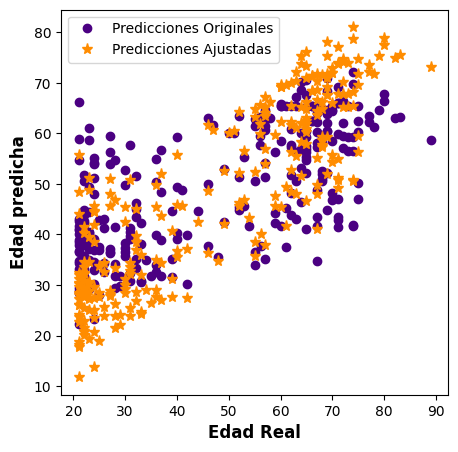

In [43]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(xgb_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(xgb_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [54]:
with open(f'{path}Brain_Age/Age_Array/xgb_edad_predicha_array.pickle', 'wb') as file:
       pickle.dump(y_pred_corrected, file)

# ...

In [27]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_OCC_right: 545.9853515625
IAF_OCC_left: 529.087890625
IAF_OCC_right: 459.53778076171875
High_subj_spec_EPP_CING_right: 317.821533203125
Low_subj_spec_RPD_CING_right: 284.311767578125
Low_subj_spec_EPP_PARIET_right: 261.3995666503906
Low_subj_spec_EPP_PARIET_left: 227.60816955566406
Low_subj_spec_RPD_OCC_left: 207.67872619628906
Low_subj_spec_RPD_HPC_left: 207.02586364746094
High_subj_spec_RPD_CING_right: 195.58050537109375
Alpha2_canon_EPP_HPC_left: 165.41683959960938
Alpha2_canon_EPP_PARIET_left: 134.93560791015625
High_subj_spec_EPP_OCC_left: 131.25457763671875
Low_subj_spec_EPP_CING_left: 123.58375549316406
Alpha2_canon_RPD_CING_right: 121.30313873291016
Low_subj_spec_RPD_HPC_right: 116.64518737792969
High_subj_spec_EPP_HPC_left: 108.45146942138672
High_subj_spec_EPP_PARIET_right: 108.10263061523438
Low_subj_spec_RPD_PARIET_left: 98.87782287597656
Alpha2_canon_EPP_PARIET_right: 92.81246185302734
High_su

In [7]:
with open(f'{path}Opt_Model/shap_values_xgb.pickle', 'rb') as file:
    shap_values = pickle.load(file)

with open(f'{path}Opt_Model/shap_summary_sorted_xgb.pickle', 'rb') as file:
    shap_summary_sorted = pickle.load(file)

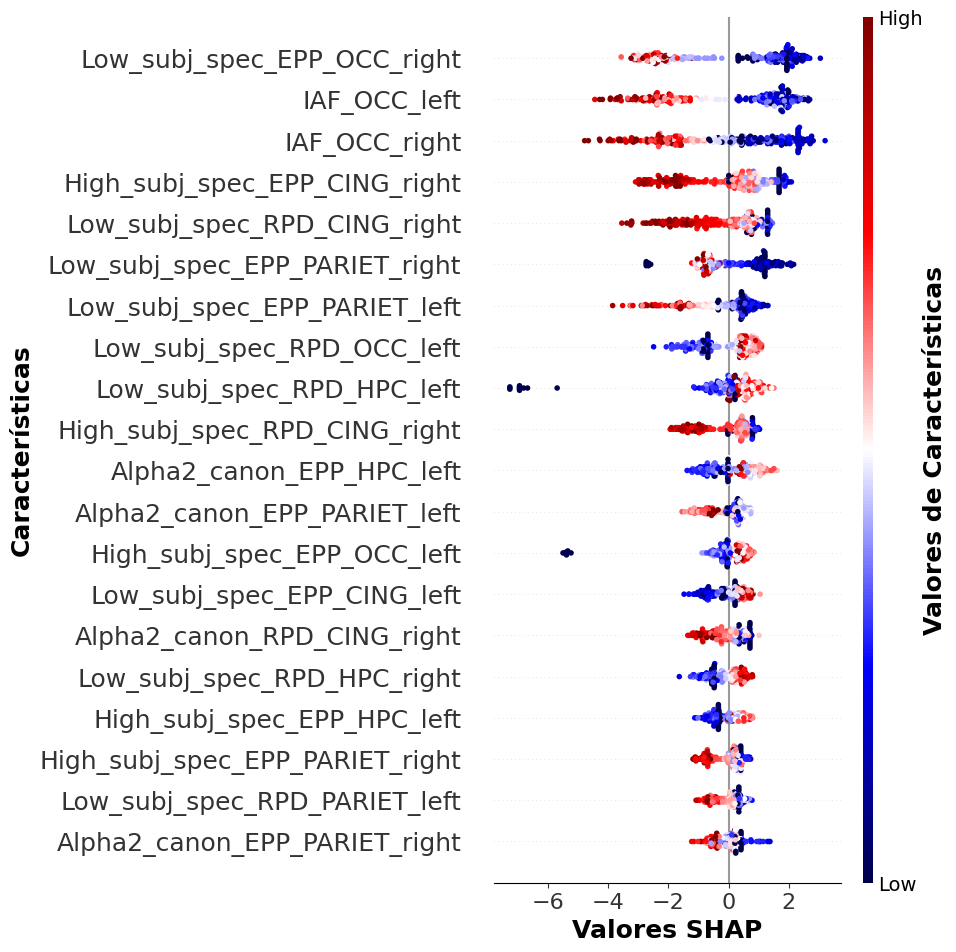

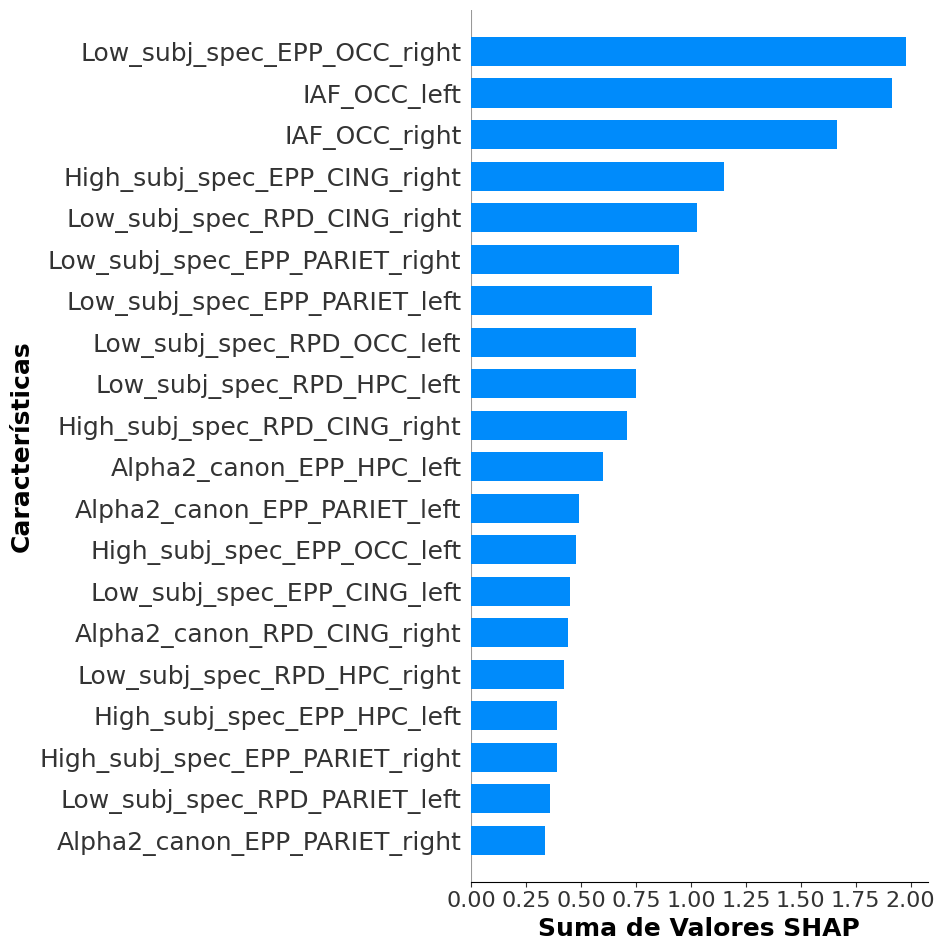

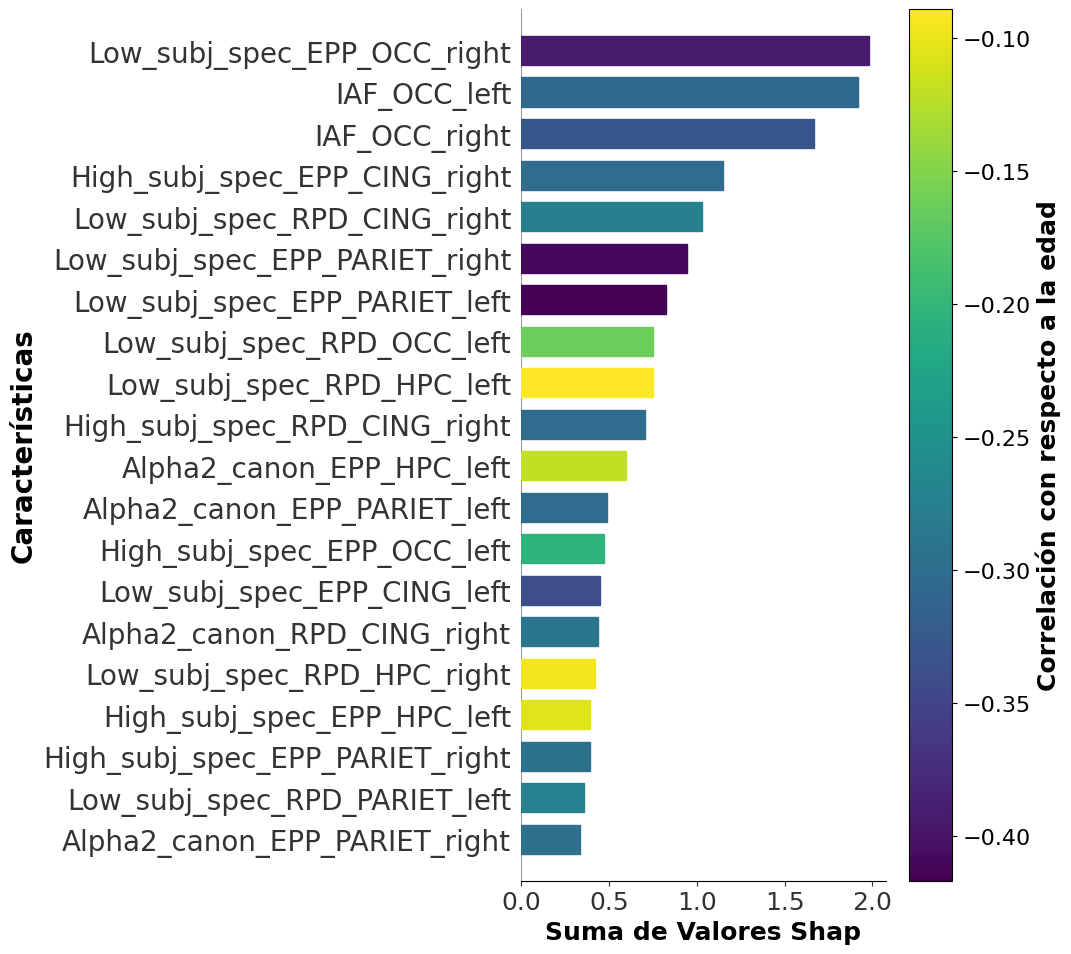

In [8]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test)

In [32]:
with open(f'{path}Opt_Model/shap_values_xgb.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model/shap_summary_sorted_xgb.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

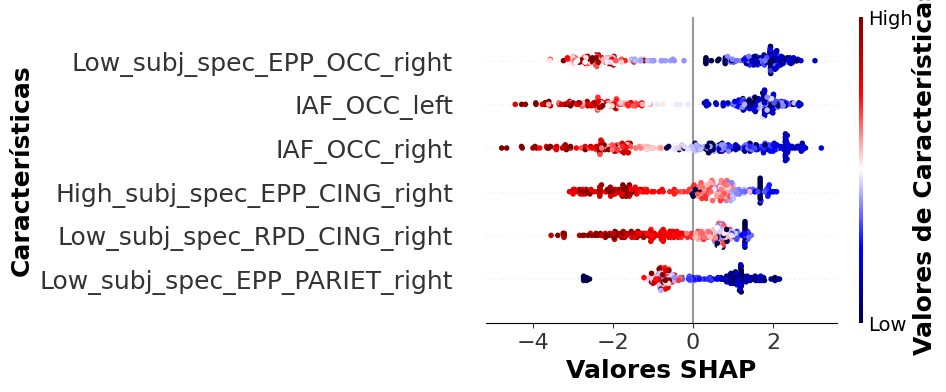

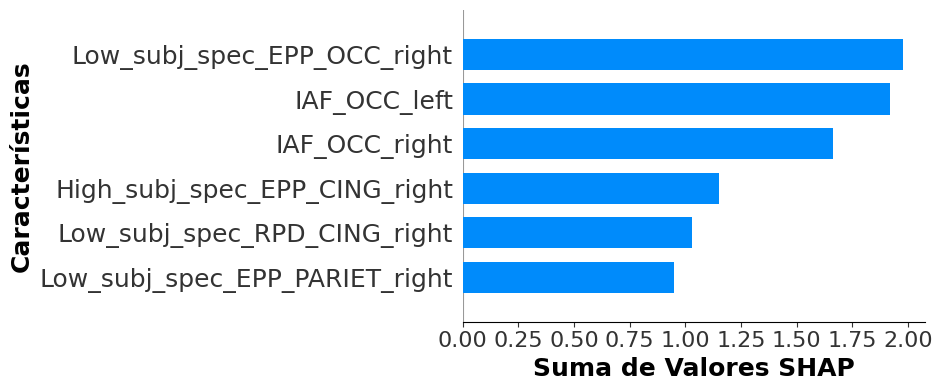

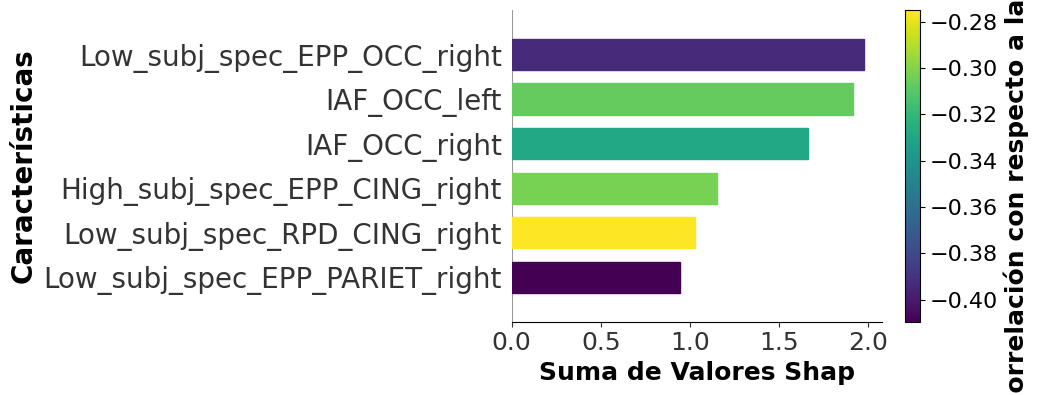

In [9]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test, max_features=6)

# Importancia por region

In [5]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_xgb.pickle', 'rb') as file:
    shap_summary_sorted_xgb = pickle.load(file)


In [31]:
shap_por_region_sorted, resultado_normalizado_sorted=xgb_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

OCC_right: 1.000000
CING_right: 0.913969
OCC_left: 0.863253
HPC_left: 0.478253
PARIET_right: 0.459775
PARIET_left: 0.458887
CING_left: 0.122905
HPC_right: 0.116004


In [33]:
resultado_normalizado_sorted

{'OCC_right': 1.0,
 'CING_right': 0.9139689733054575,
 'OCC_left': 0.8632533320756314,
 'HPC_left': 0.47825271961361354,
 'PARIET_right': 0.4597752595209163,
 'PARIET_left': 0.4588871061327479,
 'CING_left': 0.1229049352723553,
 'HPC_right': 0.11600447928861657}

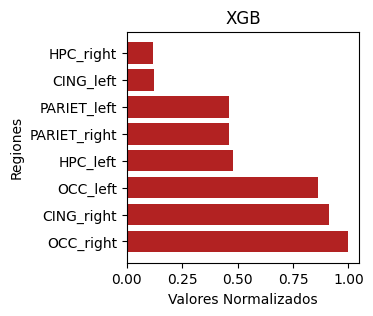

In [34]:
xgb_model.plot_normalized_values(resultado_normalizado_sorted, color='firebrick', name_set='XGB',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


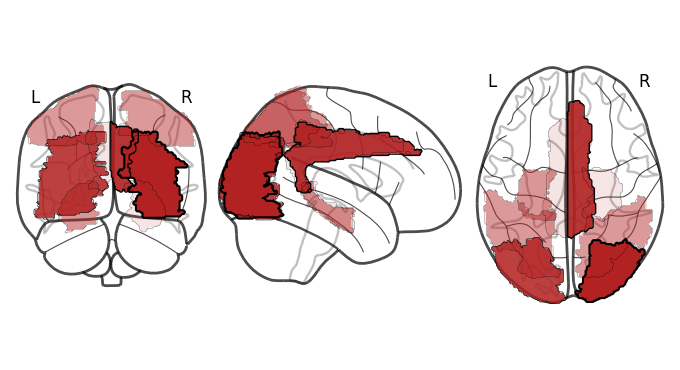

In [35]:
base_path = f'{path}cerebritos/'

xgb_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='firebrick')

# Incremento de Metricas


In [ ]:
resultado_incremento = xgb_model.evaluacion_incremento_metricas(shap_values=shap_values,n_iter=100)


In [ ]:
xgb_model.guardar_incremento_metricas(results_metricas=resultado_incremento)


In [ ]:
with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/XGBoost/Modelos/resultado_incremento_XGB_model_all_features.pickle', 'wb') as file:
    pickle.dump(resultado_incremento, file)

In [30]:
with open('C:/Users/felipe/Documents/Opt_Model/resultado_incremento_XGB_model_all_features.pickle', 'rb') as file:
    resultado_incremento= pickle.load(file)

In [ ]:
resultado_incremento

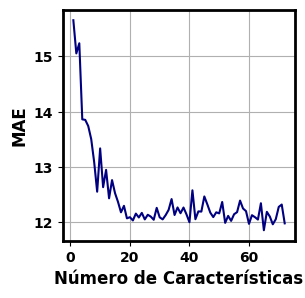

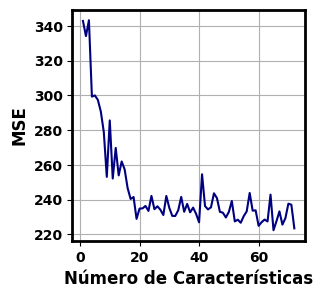

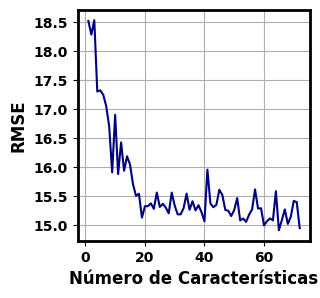

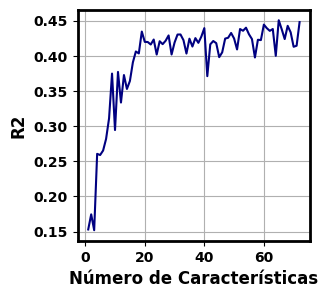

In [4]:
xgb_model.plot_incremento_metricas(resultado_incremento, x_size=3, y_size=3)

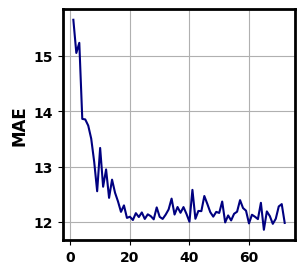

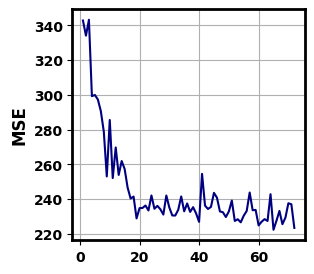

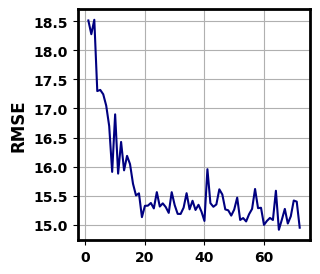

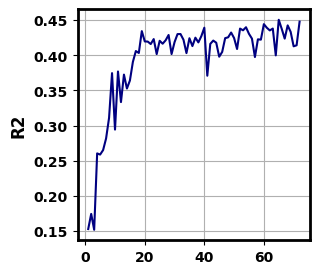

In [5]:
xgb_model.plot_incremento_metricas(resultado_incremento, x_size=3, y_size=3, label_x=False)

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Rutas de las imágenes
imagenes = [
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_MAE_all_features.png",
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_MSE_all_features.png",
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_RMSE_all_features.png",
    "C:/Users/felipe/Documents/XGBoost/figuras/incremento_metricas_R2_all_features.png",
    
]

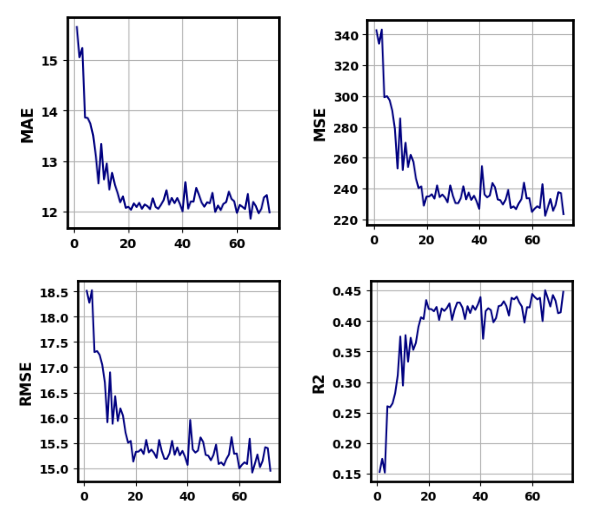

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Rutas de las imágenes
imagenes = [
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MAE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_RMSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_R2_all_features.png",
]

# Crear una figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Iterar sobre las imágenes y ejes para mostrar cada imagen en la cuadrícula
for ax, img_path in zip(axes.flatten(), imagenes):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Ocultar los ejes

# Ajustar el diseño
plt.tight_layout()

# Agregar un título general
#plt.suptitle('', fontweight='bold', fontsize=14)

# Ajustar el espacio superior para el título
plt.subplots_adjust(top=0.9)

# Mostrar el gráfico
plt.show()

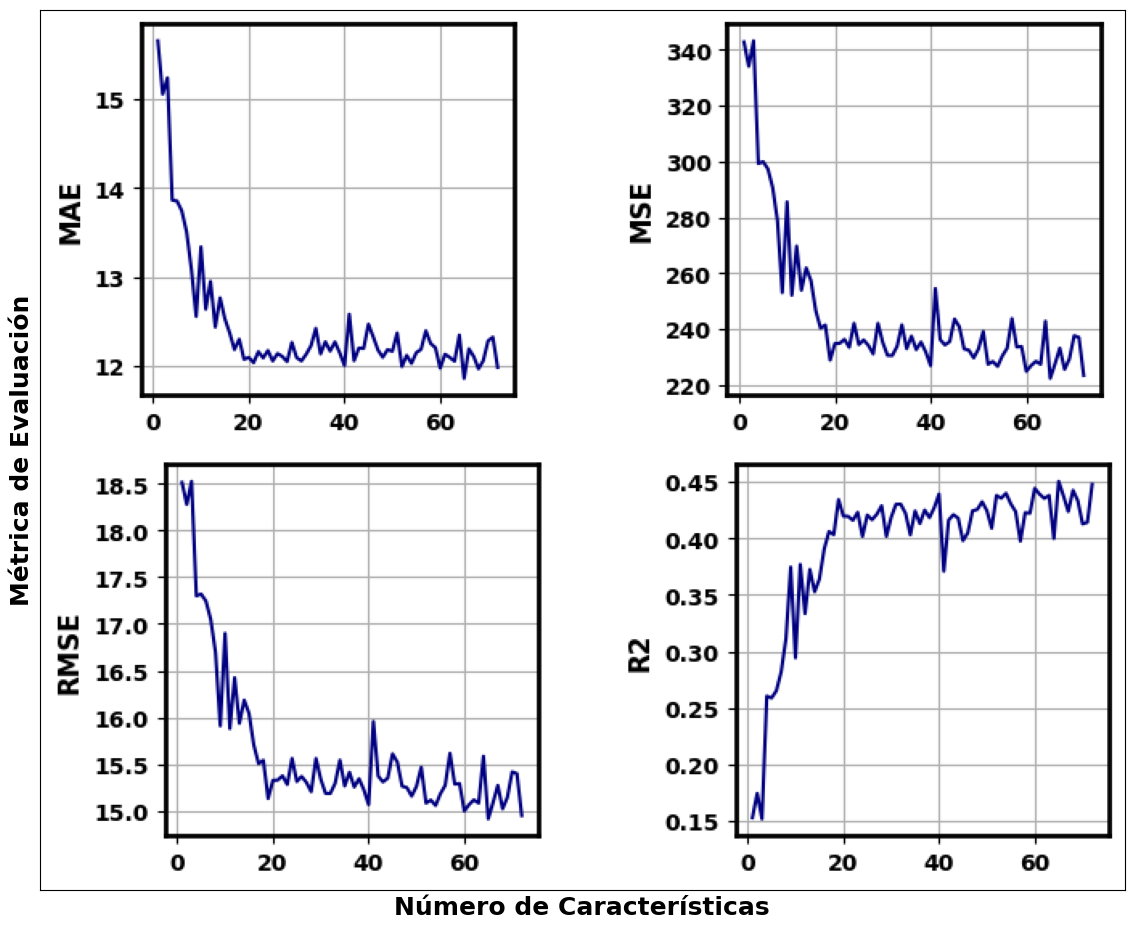

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

# Rutas de las imágenes
imagenes = [
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MAE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_MSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_RMSE_all_features.png",
    "C:/Users/felipe/Documents/Brain_Age_/XGBoost/figuras/incremento_metricas_R2_all_features.png",
]

# Cargar las imágenes con PIL para obtener sus dimensiones
imagenes_abiertas = [Image.open(img) for img in imagenes]
ancho, alto = imagenes_abiertas[0].size

# Definir un desplazamiento adicional para la separación horizontal
desplazamiento_horizontal = 50

# Crear una nueva imagen en blanco con el tamaño adecuado
ancho_compuesto = ancho * 2 + desplazamiento_horizontal +15
alto_compuesto = alto * 2
imagen_compuesta = Image.new('RGB', (ancho_compuesto, alto_compuesto), (255, 255, 255))  # Fondo blanco

# Pegar las imágenes abiertas en la imagen compuesta
for i, imagen in enumerate(imagenes_abiertas):
    x = (i % 2) * (ancho + desplazamiento_horizontal)
    y = (i // 2) * alto
    imagen_compuesta.paste(imagen, (x, y))

# Convertir a un formato que Matplotlib pueda mostrar
imagen_compuesta = imagen_compuesta.convert("RGB")

# Mostrar la imagen compuesta usando Matplotlib
plt.figure(figsize=(14, 14))  # Ajustar el tamaño de la figura
plt.imshow(imagen_compuesta)
plt.xticks([])  # Ocultar los números del eje X
plt.yticks([])  # Ocultar los números del eje Y
plt.xlabel('Número de Características', fontweight='bold', fontsize=18)  # Añadir etiqueta al eje X
plt.ylabel('Métrica de Evaluación', fontweight='bold', fontsize=18)  # Añadir etiqueta al eje Y
plt.show()


In [ ]:
resultado_incremento

# Entrenamiento con las 20 mejores metricas

In [10]:
with open(f'{path}Opt_Model/shap_summary_sorted_xgb.pickle', 'rb') as file:
    shap_summary_sorted= pickle.load(file)

In [11]:
shap_summary_sorted

[('Low_subj_spec_EPP_OCC_right', 545.98535),
 ('IAF_OCC_left', 529.0879),
 ('IAF_OCC_right', 459.53778),
 ('High_subj_spec_EPP_CING_right', 317.82153),
 ('Low_subj_spec_RPD_CING_right', 284.31177),
 ('Low_subj_spec_EPP_PARIET_right', 261.39957),
 ('Low_subj_spec_EPP_PARIET_left', 227.60817),
 ('Low_subj_spec_RPD_OCC_left', 207.67873),
 ('Low_subj_spec_RPD_HPC_left', 207.02586),
 ('High_subj_spec_RPD_CING_right', 195.5805),
 ('Alpha2_canon_EPP_HPC_left', 165.41684),
 ('Alpha2_canon_EPP_PARIET_left', 134.93561),
 ('High_subj_spec_EPP_OCC_left', 131.25458),
 ('Low_subj_spec_EPP_CING_left', 123.583755),
 ('Alpha2_canon_RPD_CING_right', 121.30314),
 ('Low_subj_spec_RPD_HPC_right', 116.64519),
 ('High_subj_spec_EPP_HPC_left', 108.45147),
 ('High_subj_spec_EPP_PARIET_right', 108.10263),
 ('Low_subj_spec_RPD_PARIET_left', 98.87782),
 ('Alpha2_canon_EPP_PARIET_right', 92.81246),
 ('High_subj_spec_EPP_PARIET_left', 90.52804),
 ('Low_subj_spec_RPD_CING_left', 82.68813),
 ('Alpha2_canon_RPD_PARIET

In [12]:
top_20_features = [feature[0] for feature in shap_summary_sorted[:20]]

In [13]:
X_train = xgb_model.X_train[top_20_features]
X_test = xgb_model.X_test[top_20_features]  

In [14]:
X_train

,Low_subj_spec_EPP_OCC_right,IAF_OCC_left,IAF_OCC_right,High_subj_spec_EPP_CING_right,Low_subj_spec_RPD_CING_right,Low_subj_spec_EPP_PARIET_right,Low_subj_spec_EPP_PARIET_left,Low_subj_spec_RPD_OCC_left,Low_subj_spec_RPD_HPC_left,High_subj_spec_RPD_CING_right,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_PARIET_left,High_subj_spec_EPP_OCC_left,Low_subj_spec_EPP_CING_left,Alpha2_canon_RPD_CING_right,Low_subj_spec_RPD_HPC_right,High_subj_spec_EPP_HPC_left,High_subj_spec_EPP_PARIET_right,Low_subj_spec_RPD_PARIET_left,Alpha2_canon_EPP_PARIET_right
90,0.487541,0.843750,0.875000,0.370318,0.326273,0.796642,0.705040,0.332177,0.208007,0.370318,0.443012,0.503964,0.357270,0.464448,0.639835,0.390519,0.233336,0.429993,0.420348,0.557059
875,0.051243,0.291667,0.114583,0.160232,0.195012,0.161374,0.198702,0.171450,0.180316,0.160232,0.246819,0.392366,0.163951,0.188425,0.227707,0.215902,0.170518,0.176537,0.497486,0.173703
1071,0.142075,0.187500,0.197917,0.226160,0.288595,0.157601,0.043184,0.270516,0.090282,0.226160,0.110016,0.254145,0.239541,0.133776,0.289306,0.102302,0.081674,0.308902,0.392550,0.242630
262,0.098574,0.322917,0.343750,0.152320,0.196813,0.173004,0.192586,0.155435,0.086863,0.152320,0.107690,0.171272,0.149700,0.127470,0.159159,0.132519,0.084524,0.167075,0.252950,0.153490
680,0.011097,0.000000,0.000000,0.094274,0.119976,0.020399,0.063040,0.132959,0.081681,0.094274,0.111676,0.188762,0.127724,0.012727,0.128172,0.129119,0.078393,0.186980,0.255791,0.173093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.072804,0.083333,0.072917,0.238912,0.299883,0.136618,0.129358,0.284587,0.189364,0.238912,0.241545,0.280236,0.272873,0.031523,0.312470,0.282595,0.179068,0.279437,0.363259,0.254759
905,0.274133,0.562500,0.552083,0.227772,0.230374,0.389545,0.495726,0.275785,0.231332,0.227772,0.347318,0.387011,0.305934,0.262851,0.343200,0.275486,0.241652,0.287768,0.407738,0.336943
1096,0.186708,0.281250,0.291667,0.188912,0.235172,0.483197,0.489033,0.219322,0.118949,0.188912,0.191804,0.391482,0.223372,0.337502,0.278745,0.278333,0.121075,0.318646,0.363607,0.347137
235,0.115400,0.156250,0.166667,0.171967,0.176944,0.149962,0.313845,0.269187,0.185259,0.171967,0.214283,0.286065,0.250725,0.284546,0.232715,0.313251,0.173672,0.292487,0.372461,0.265898


In [15]:
opt_model_top20, parametros_top20 = xgb_model.search_best_model(X=X_train, n_iter_=100, n_jobs_=-2)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [16]:
#with open(f'{path}Opt_Model/opt_XGB_model_top20.pickle', 'wb') as file:
    #pickle.dump(opt_model_top20, file)

In [9]:
with open(f'{path}Opt_Model/opt_XGB_model_top20.pickle', 'rb') as file:
    opt_model_top20 = pickle.load(file)

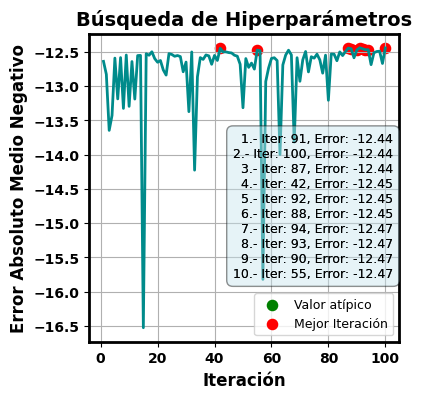

Top 1: Iteración 91, Error -12.43905707488189
Top 2: Iteración 100, Error -12.442269633009627
Top 3: Iteración 87, Error -12.444044874583376
Top 4: Iteración 42, Error -12.447412052576313
Top 5: Iteración 92, Error -12.453952196841353
Top 6: Iteración 88, Error -12.454344091798124
Top 7: Iteración 94, Error -12.467831964188184
Top 8: Iteración 93, Error -12.468100948661785
Top 9: Iteración 90, Error -12.472061594385869
Top 10: Iteración 55, Error -12.473488011465612


In [17]:
xgb_model.plot_search_best_model(opt_model_top20, color='darkcyan', linewidth=2)

In [18]:
best_params_xgb_top20 = xgb_model.best_hyper(opt_model_top20)

In [19]:
best_params_xgb_top20

[{'colsample_bytree': 0.65837393775229,
  'learning_rate': 0.0011048139444984658,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.3517621212631705},
 {'colsample_bytree': 0.6086478982007949,
  'learning_rate': 0.001571867631584057,
  'max_depth': 10,
  'n_estimators': 4692,
  'subsample': 0.28281845690793417},
 {'colsample_bytree': 0.6683585066756657,
  'learning_rate': 0.0015022845917991516,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.281156470382975},
 {'colsample_bytree': 0.7737049907442993,
  'learning_rate': 0.019243410291043164,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.5803030543770146},
 {'colsample_bytree': 0.6569611191937709,
  'learning_rate': 0.0010239859825409347,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.35311533452504706},
 {'colsample_bytree': 0.6995915969340855,
  'learning_rate': 0.0013437343849497883,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.29938798288968593},
 {'colsample_bytree': 0.

In [20]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 10,
                "eval_metric": "mae",
                "eval_set": [(X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(X_train=X_train,X_test=X_test,params_=best_params_xgb_top20[0])

In [35]:
with open(f'{path}Opt_Model/BestModel_XGB_all_features_top20.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open(f'{path}Opt_Model/results_XGB_model_all_features_top20.pickle', 'wb') as file:
    pickle.dump(results, file)

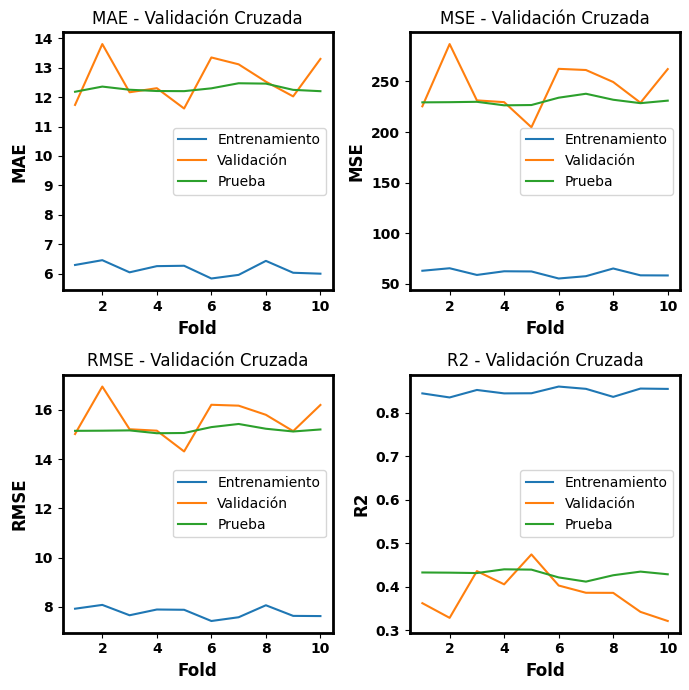

In [22]:
xgb_model.plot_metricas_evaluacion(results)

In [23]:
y_pred_top20=xgb_model.predicter(X_test=X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     224.1
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.96e-37
Time:                        12:53:21   Log-Likelihood:                -999.90
No. Observations:                 276   AIC:                             2004.
Df Residuals:                     274   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6223      1.400     21.165      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


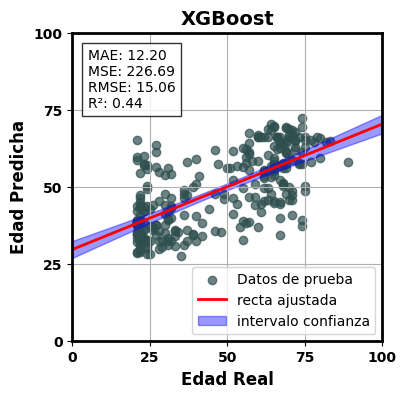

Error medio absoluto: 12.202421750423412
Error cuadrático medio: 226.6897885360749
Raíz del error cuadrático medio: 15.05622092478969
Coeficiente de determinación (R²): 0.43986730450747324


In [24]:
xgb_model.plot_regresion(y=y_pred_top20,x= xgb_model.y_test,label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='XGBoost',line_ideal=False,confidence_interval=True, color='darkslategray',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [25]:
y_pred_train=xgb_model.predicter(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     6343.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:53:27   Log-Likelihood:                -3439.8
No. Observations:                1101   AIC:                             6884.
Df Residuals:                    1099   BIC:                             6894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9636      0.444     38.164      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


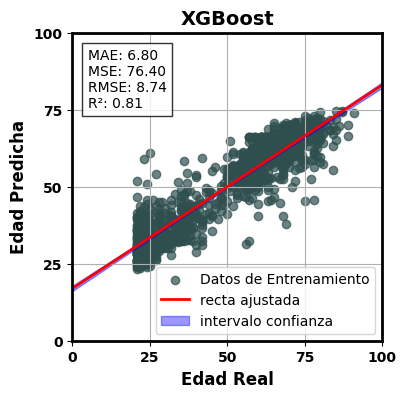

Error medio absoluto: 6.8047548618022144
Error cuadrático medio: 76.39585756706468
Raíz del error cuadrático medio: 8.740472388095776
Coeficiente de determinación (R²): 0.8092100632832284


In [26]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, label_='Datos de Entrenamiento',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='darkslategray', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [27]:
residuals = xgb_model.predicter(X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1673.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          5.22e-223
Time:                        12:53:34   Log-Likelihood:                -3439.8
No. Observations:                1101   AIC:                             6884.
Df Residuals:                    1099   BIC:                             6894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9636      0.444     38.164      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


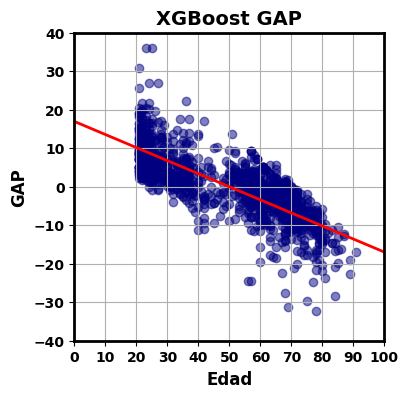

Error medio absoluto: 49.678845441669836
Error cuadrático medio: 3209.008420049219
Raíz del error cuadrático medio: 56.648110472011496
Coeficiente de determinación (R²): -7.0141323480440345


In [28]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='XGBoost GAP', xlabel='Edad', ylabel='GAP')

In [29]:
y_pred_corrected=xgb_model.predicter_corrected(X_test=X_test, X_train=X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     753.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.36e-80
Time:                        12:53:47   Log-Likelihood:                -999.90
No. Observations:                 276   AIC:                             2004.
Df Residuals:                     274   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6587      1.400      9.045      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


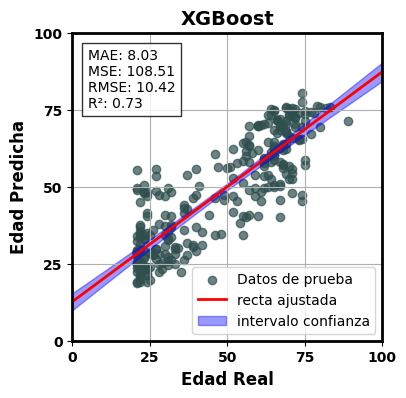

Error medio absoluto: 8.026914815475937
Error cuadrático medio: 108.50768393864934
Raíz del error cuadrático medio: 10.416702162328024
Coeficiente de determinación (R²): 0.7318860197510193


In [30]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test,label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='darkslategray', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False, xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

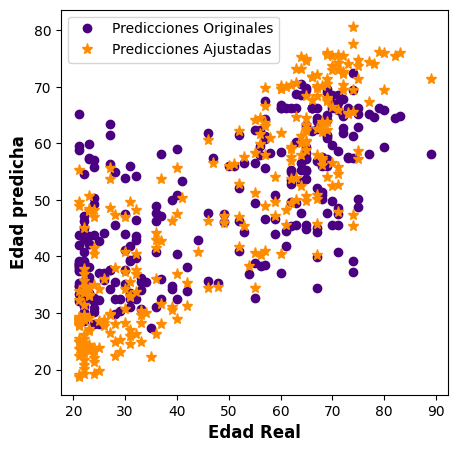

In [31]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(xgb_model.y_test, y_pred_top20, 'o', label='Predicciones Originales',color='indigo')
plt.plot(xgb_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [32]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_OCC_right: 545.9518432617188
IAF_OCC_left: 514.6292114257812
IAF_OCC_right: 461.9634704589844
High_subj_spec_EPP_CING_right: 382.1302185058594
Low_subj_spec_EPP_PARIET_left: 350.398681640625
Low_subj_spec_EPP_PARIET_right: 335.99951171875
Low_subj_spec_RPD_CING_right: 309.6076965332031
Low_subj_spec_RPD_OCC_left: 308.76953125
Low_subj_spec_RPD_HPC_left: 288.31854248046875
Low_subj_spec_RPD_HPC_right: 273.7261047363281
Alpha2_canon_EPP_PARIET_left: 233.9142608642578
Low_subj_spec_EPP_CING_left: 226.04258728027344
Alpha2_canon_EPP_HPC_left: 205.62673950195312
High_subj_spec_RPD_CING_right: 198.64129638671875
Alpha2_canon_RPD_CING_right: 195.18386840820312
High_subj_spec_EPP_PARIET_right: 189.3328399658203
High_subj_spec_EPP_HPC_left: 175.03424072265625
Low_subj_spec_RPD_PARIET_left: 171.47987365722656
Alpha2_canon_EPP_PARIET_right: 161.53817749023438
High_subj_spec_EPP_OCC_left: 159.5002899169922


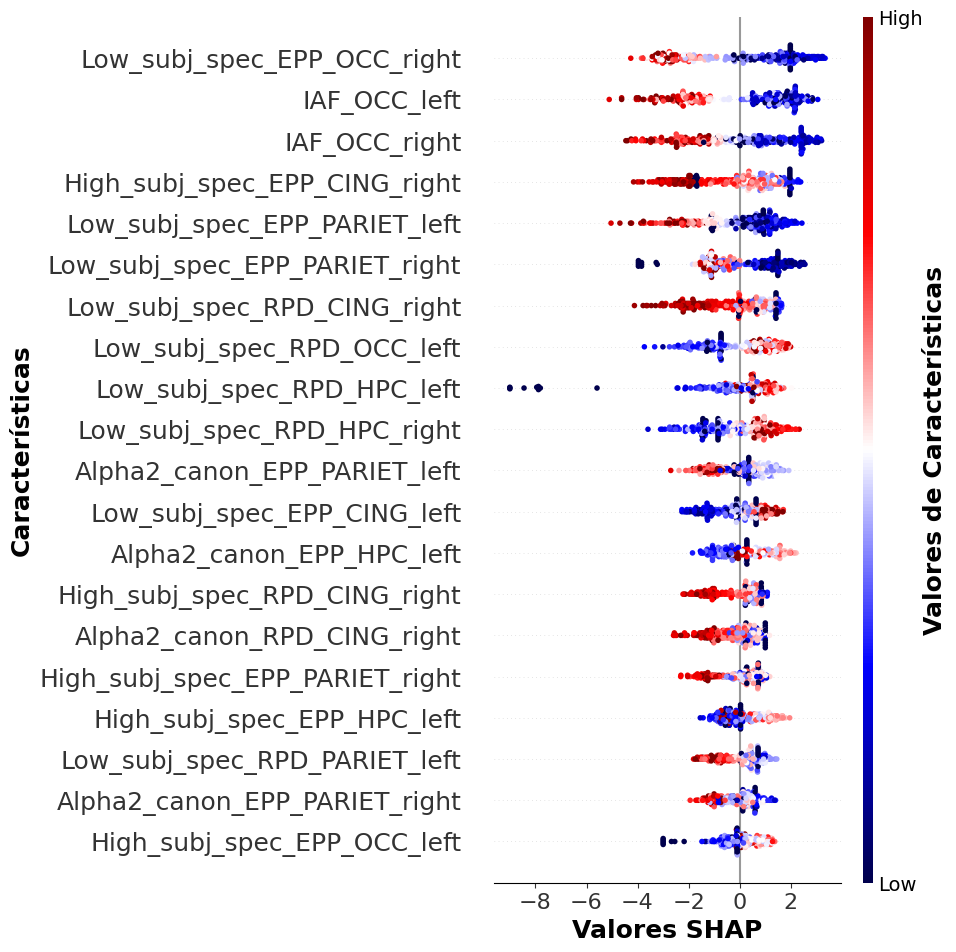

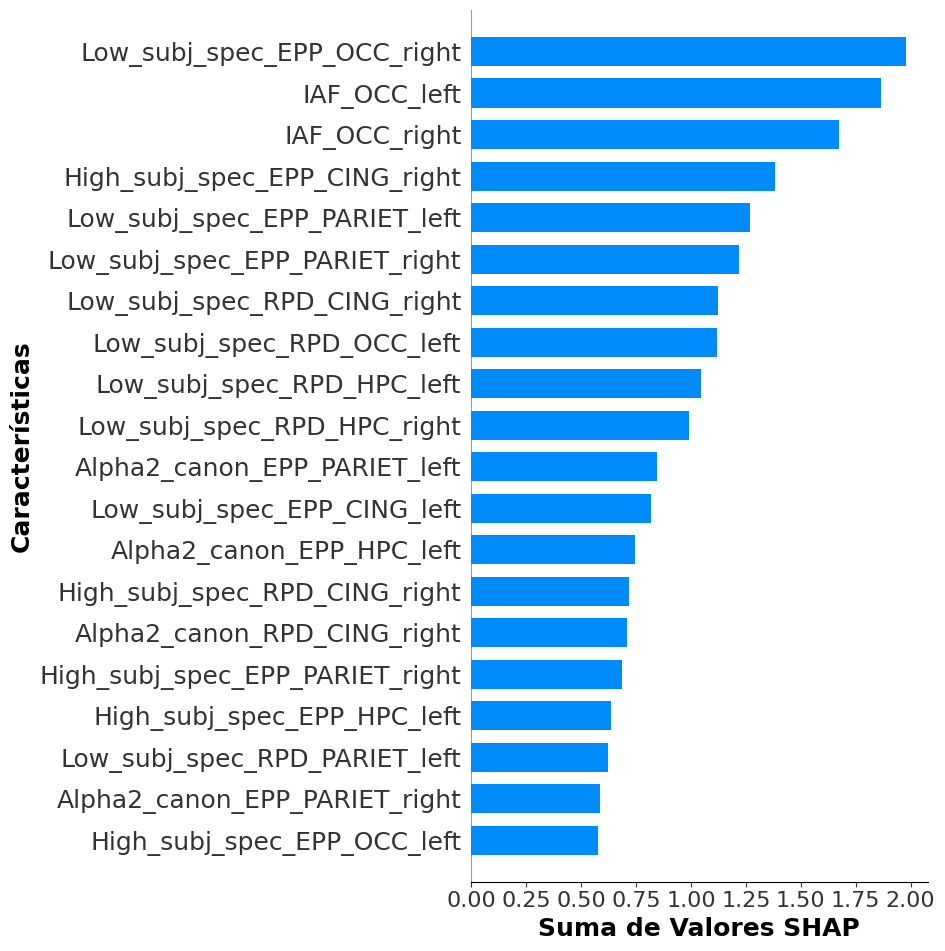

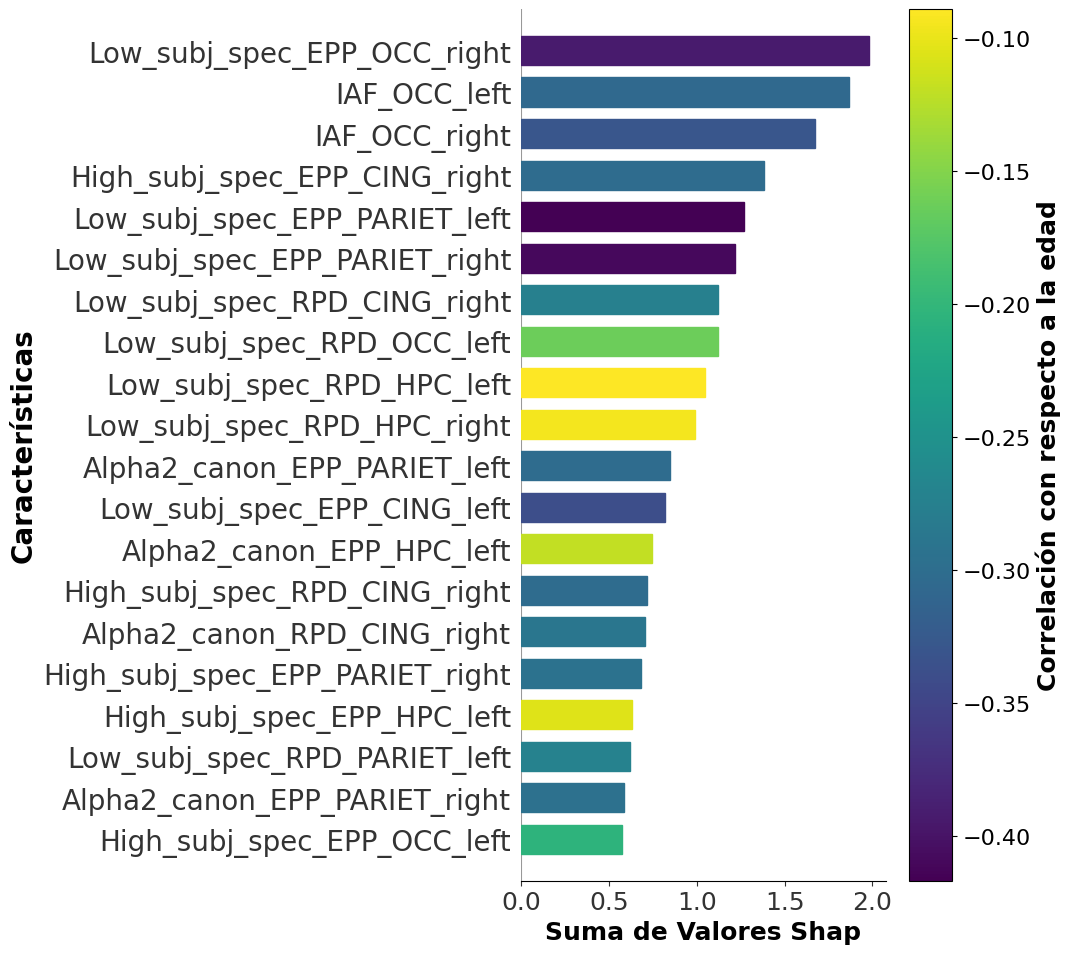

In [33]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=X_test,y_test=xgb_model.y_test)